In [12]:
import matplotlib.pyplot as plt
import sys
from glob import glob
from matplotlib import cm
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.collections import LineCollection
import numpy as np
import seaborn as sns
import DNSmodule as dns
from scipy.optimize import curve_fit



params = {'legend.fontsize':'13','axes.labelsize':'23','xtick.labelsize':'20','ytick.labelsize':'20'} # large#
#params = {'legend.fontsize':'15','axes.labelsize':'27','xtick.labelsize':'25','ytick.labelsize':'25'} # mid
#params = {'legend.fontsize':'25','axes.labelsize':'38','xtick.labelsize':'33','ytick.labelsize':'33'} # small 

plt.rcParams.update(params)
plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amssymb}')
plt.rc('font',family='serif')
#cols = ['#df1e36','#e62f44','#c9c900','#113f7e','#091f3f']
colours = ['#df1e36','#c9c900','#091f3f']
cols = ['#df1e36','#c9c900','#091f3f']
red  = cols[0]
yel  = cols[1]
blue = cols[2]

In [6]:
col_rock = sns.color_palette('rocket',11)[7]
col_mako = sns.color_palette('mako',11)[1]

/home/andres/MHD_decaying/decaying_mhd_DNS/new_data/DNSmodule.py:696: RuntimeWarning: invalid value encountered in true_divide
  Tu = Lu/U
/home/andres/MHD_decaying/decaying_mhd_DNS/new_data/DNSmodule.py:709: RuntimeWarning: divide by zero encountered in true_divide
  lu = np.power(visc**3/epsu,1/4)


ZERO_VEL/Lu/nhG_zero_vel.b_2048_0.0003125_1.spc
0.0
0.21021137422767575
0.840845496910703
3.363381987642812
13.453527950571248
52.447737869805096
increasing_Re/nhel/nhG.b_2048_0.0003125_1.spc
0.0
0.2102011815554881
0.8408047262219523
3.3632189048878094
13.452875619551238
52.44519479809428


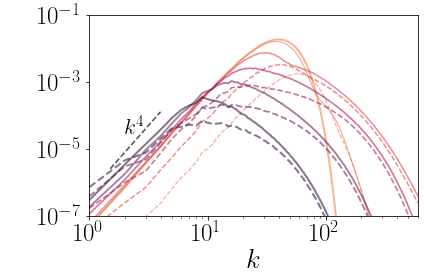

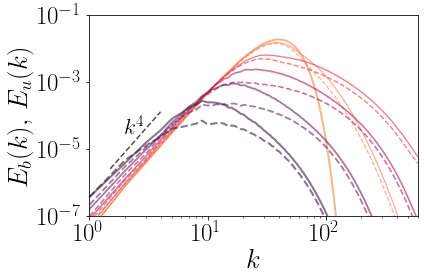

In [7]:
f_NH = ['ZERO_VEL/Lu/nhG_zero_vel.b_2048_0.0003125_1.spc','increasing_Re/nhel/nhG.b_2048_0.0003125_1.spc']
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(viscs)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
t = [0,2,8,32,128,499]
lws = np.linspace(1,2,len(t))

col_NH = sns.color_palette('rocket',len(t))
col_NH.reverse()
t_T = []
labs = ['zero','equi']
for idx, f in enumerate(f_NH):
    print(f)

    fig, ax = plt.subplots()
    Bk = Bks[idx]
    Ek = Eks[idx]
    Pm = Pms[idx]
    T = Tbs[idx][0]
    t_T.append(t/T)
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    
    U= Us[idx]
    Lu= Lus[idx]
    visc = viscs[idx]
    
    lab = labs[idx]

    for id_t,idx_t in enumerate(t):
        print(time[idx_t]/T)
        if idx_t == 0:
            ax.plot(k,Bk[idx_t],c=col_NH[id_t],lw=2,ls='-',label ='__nolegend__')
        else:
            ax.plot(k,Bk[idx_t],c=col_NH[id_t],alpha = 0.6, lw = lws[id_t])
            ax.plot(k,Ek[idx_t],c=col_NH[id_t],alpha = 0.6, ls='--',lw = lws[id_t])
    k_slope = np.array([1.5,4])
    ax.plot(k_slope,5e-7*np.power(k_slope,4),c='0.3',ls='--')
    ax.text(2,3e-5,'$k^{4}$',size=22)
    
 
    
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel('$E_b(k),\, E_u(k)$',c='k' if idx==1 else 'w')
    ax.set_xlabel('$k$')
    ax.set_ylim(1e-7,1e-1)
    ax.set_xlim(1,600)
    
    fig.tight_layout()
    fig.savefig('Eb_nh_{}_thesis.pdf'.format(lab),format='pdf')

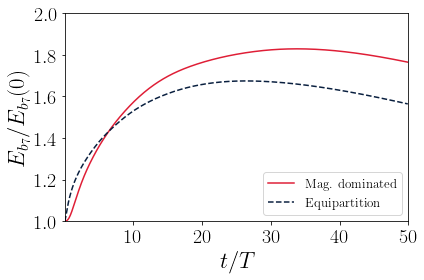

In [19]:

figE, axE0 = plt.subplots()


E_mhd_zero= dns.col_E(f_NH[0])
E_mhd_equi = dns.col_E(f_NH[1])


Ekb_mhd_zero = dns.B_spectrum(f_NH[0])
Ekb_mhd_equi = dns.B_spectrum(f_NH[1])

k2048 = np.arange(1,int(2048/3),1)



t_mhd_zero = dns.col_t(f_NH[0])


t_mhd_equi = dns.col_t(f_NH[1])



E3_mhd_zero = dns.integrate(Ekb_mhd_zero,0,8,k2048)
E3_mhd_equi = dns.integrate(Ekb_mhd_equi,0,8,k2048)


axE0.plot(t_mhd_zero[:-1]/0.1, E3_mhd_zero/E3_mhd_zero[0], color=red,ls='-',label='Mag. dominated')
axE0.plot(t_mhd_equi[:-1]/0.1, E3_mhd_equi/E3_mhd_equi[0], color=blue,ls='--',label='Equipartition')

    
    
#axE.set_xscale('log')
#axE0.set_yscale('log')
axE0.set_ylabel('$E_{b_7}/E_{b_7}(0)$')
axE0.set_xlabel('$t/T$')


axE0.set_xlim(1e-1,50)
axE0.set_ylim(1,2)

axE0.legend(loc=4)
figE.tight_layout()
figE.savefig('E7_vs_t_comparison_MHD_HD_thesis.pdf',format='pdf')

plt.show()